In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
df_cust = pd.read_csv("datasets/customers.csv")
df_cs =  pd.read_csv("datasets/credit_profiles.csv")
df_trans = pd.read_csv("datasets/transactions.csv")

In [12]:
df_cust.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married


In [13]:
df_cs.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0


In [14]:
df_trans.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


In [15]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [16]:
df_cust.isna().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [17]:
df_cust[df_cust["annual_income"].isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [18]:
df_cust[df_cust["annual_income"].isna()].shape

(50, 8)

In [19]:
occ_wise_median = df_cust.groupby("occupation")["annual_income"].median()
occ_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [20]:
def get_annual_income(row):
    if pd.isna(row["annual_income"]):
        return occ_wise_median[row["occupation"]]
    else:
        return row["annual_income"]

In [21]:
df_cust["annual_income"] = df_cust.apply(get_annual_income, axis=1)

In [22]:
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Treating outliers

In [23]:
occ_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [24]:
for index, row in df_cust.iterrows():
    if row["annual_income"]<100:
        df_cust.at[index, "annual_income"] = occ_wise_median[row["occupation"]]

In [25]:
df_cust[df_cust["annual_income"]<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Data Visualization

In [26]:
avg_income_per_occ = df_cust.groupby("occupation")['annual_income'].mean()
avg_income_per_occ

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

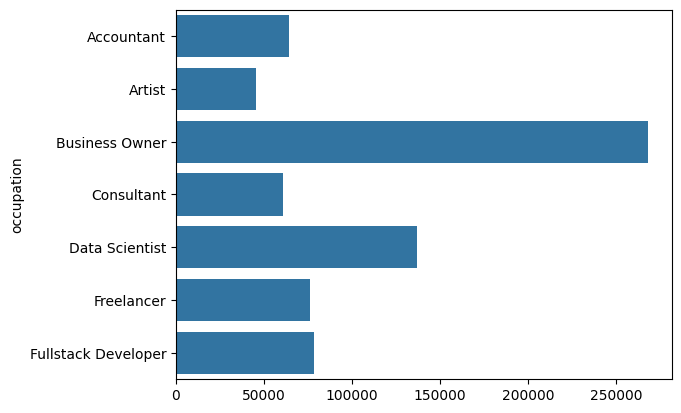

In [27]:
sns.barplot(y=avg_income_per_occ.index, x=avg_income_per_occ.values, orient="h")
plt.show()

Age Outliers

In [28]:
outliers = df_cust[(df_cust["age"]>80) | (df_cust["age"]<15)]
outliers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married


In [29]:
occ_wise_age = df_cust.groupby("occupation")["age"].median()
occ_wise_age = occ_wise_age.astype("int64")

In [30]:
for index, row in outliers.iterrows():
    if row["age"]<15 or row["age"]>80:
        df_cust.at[index, "age"] = occ_wise_age[row["occupation"]]

In [31]:
df_cust[(df_cust["age"]>80) | (df_cust["age"]<15)].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Data Viz age group

In [32]:
bins = [17, 25, 48, 65]
labels = ['18-25', '26-48', '49-65']
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bins, labels=labels)
df_cust["age_group"]

0      49-65
1      26-48
2      18-25
3      18-25
4      26-48
       ...  
995    26-48
996    49-65
997    26-48
998    26-48
999    26-48
Name: age_group, Length: 1000, dtype: category
Categories (3, object): ['18-25' < '26-48' < '49-65']

In [33]:
group_wise_count = df_cust["age_group"].value_counts()
group_wise_count

age_group
26-48    567
18-25    246
49-65    187
Name: count, dtype: int64

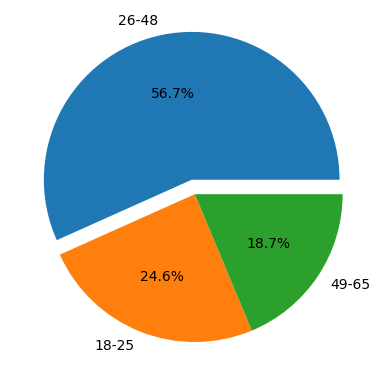

In [34]:
plt.pie(group_wise_count, labels=group_wise_count.index, autopct="%1.1f%%", explode = [0.1, 0, 0])
plt.show()

gender_location Plot

In [35]:
# Step 1: Count customers by location and gender
grouped = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)
grouped

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


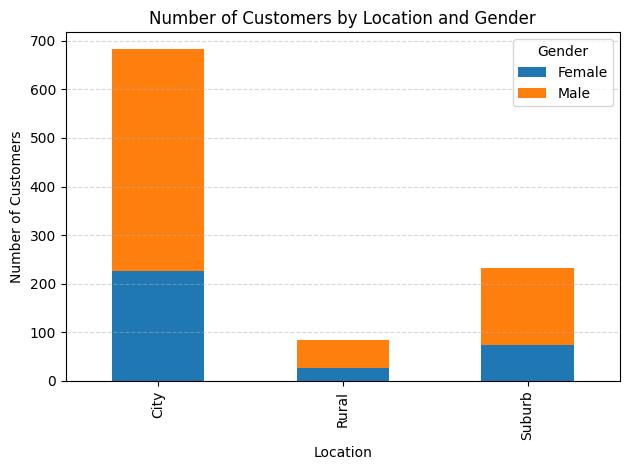

In [36]:
# Step 2: Plot

grouped.plot(kind='bar', stacked=True)
plt.title('Number of Customers by Location and Gender')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Credit score dataframe

In [37]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [38]:
df_cs.shape

(1004, 6)

In [39]:
extra_ids = df_cs[~df_cs['cust_id'].isin(df_cust['cust_id'])]
print(extra_ids)
#no extra records

Empty DataFrame
Columns: [cust_id, credit_score, credit_utilisation, outstanding_debt, credit_inquiries_last_6_months, credit_limit]
Index: []


In [40]:
df_cs['cust_id'].value_counts().loc[lambda x: x > 1]
#duplicate records

cust_id
517    2
569    2
606    2
662    2
Name: count, dtype: int64

In [54]:
df_cs_new = df_cs.drop_duplicates(subset='cust_id', keep='last').copy()
df_cs_new.shape

(1000, 6)

Cheking for null values

In [55]:
df_cs_new.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [56]:
df_cs_new[df_cs_new["credit_limit"].isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


<Axes: xlabel='credit_score', ylabel='credit_limit'>

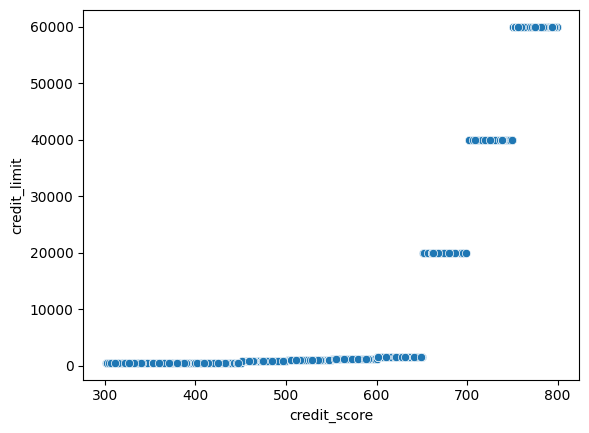

In [57]:
sns.scatterplot(x=df_cs_new["credit_score"], y=df_cs_new["credit_limit"])

In [58]:
bins = [300, 450, 500, 550, 600, 650, 700, 750, 800]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_cs_new["credit_range"] = pd.cut(df_cs_new["credit_score"], bins=bins, labels=labels)
df_cs_new

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-750
1,2,587,0.107928,161644.0,2.0,1250.0,550-600
2,3,544,0.854807,513.0,4.0,1000.0,500-550
3,4,504,0.336938,224.0,2.0,1000.0,500-550
4,5,708,0.586151,18090.0,2.0,40000.0,700-750
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-600
1000,997,774,0.465462,17139.0,0.0,60000.0,750-800
1001,998,529,0.585856,386.0,3.0,1000.0,500-550
1002,999,725,0.249670,6973.0,2.0,40000.0,700-750


In [63]:
range_wise_credit_limit = (
    df_cs_new.groupby("credit_range")["credit_limit"]
    .agg(lambda x: x.mode().iloc[0])
).reset_index()
range_wise_credit_limit

C:\Users\aryan\AppData\Local\Temp\ipykernel_3672\895359236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cs_new.groupby("credit_range")["credit_limit"]


,credit_range,credit_limit
0,300-450,500.0
1,450-500,750.0
2,500-550,1000.0
3,550-600,1250.0
4,600-650,1500.0
5,650-700,20000.0
6,700-750,40000.0
7,750-800,60000.0


In [69]:
df_cs_new1 = pd.merge(df_cs_new, range_wise_credit_limit, on="credit_range", suffixes=("", "_mode"))

In [74]:
df_cs_new1["credit_limit"].fillna(df_cs_new1["credit_limit_mode"], inplace=True)
df_cs_new1

C:\Users\aryan\AppData\Local\Temp\ipykernel_3672\284153885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cs_new1["credit_limit"].fillna(df_cs_new1["credit_limit_mode"], inplace=True)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-750,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-600,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-550,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-750,40000.0
...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-600,1250.0
995,997,774,0.465462,17139.0,0.0,60000.0,750-800,60000.0
996,998,529,0.585856,386.0,3.0,1000.0,500-550,1000.0
997,999,725,0.249670,6973.0,2.0,40000.0,700-750,40000.0


In [75]:
df_cs_new1.isna().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_range                      0
credit_limit_mode                 0
dtype: int64

In [79]:
df_cs_new1.loc[df_cs_new1["outstanding_debt"]>df_cs_new1["credit_limit"], 'outstanding_debt'] = df_cs_new1["credit_limit"]

Correlation Matrix

In [82]:
df_merged = pd.merge(df_cust, df_cs_new1, on="cust_id", how="inner")

In [81]:
numerical_columns =["credit_score", "credit_utilisation", "outstanding_debt", "credit_limit", "annual_income", "age"] 


In [86]:
corr_matrix = df_merged[numerical_columns].corr()
corr_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.068281,0.680852,0.848261,0.575794,0.447742
credit_utilisation,-0.068281,1.000000,0.193771,-0.079631,-0.085740,-0.029012
outstanding_debt,0.680852,0.193771,1.000000,0.810502,0.555506,0.445222
credit_limit,0.848261,-0.079631,0.810502,1.000000,0.684653,0.512185
annual_income,0.575794,-0.085740,0.555506,0.684653,1.000000,0.620014
age,0.447742,-0.029012,0.445222,0.512185,0.620014,1.000000


[]

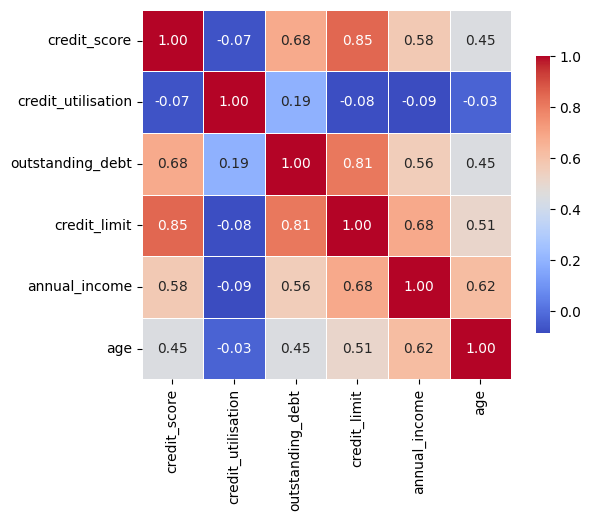

In [89]:
sns.heatmap(
    corr_matrix,               # Your correlation matrix
    annot=True,                # Show the correlation coefficients
    fmt=".2f",                 # Limit float format to 2 decimal places
    cmap="coolwarm",           # Color map
    linewidths=0.5,            # Thin lines between squares
    linecolor='white',         # Line color between boxes
    square=True,               # Make cells square
    cbar_kws={"shrink": 0.75}, # Shrink color bar size
    annot_kws={"size": 10}     # Font size of annotations
)
plt.plot()

Transactions dataframe

In [90]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [92]:
df_trans.shape

(500000, 7)

In [93]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [94]:
df_trans.isna().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [95]:
df_trans[df_trans["platform"].isna()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [97]:
df_trans["platform"].value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

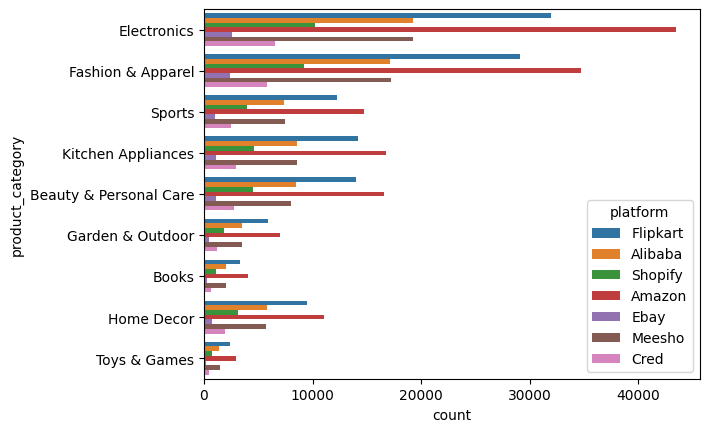

In [99]:
sns.countplot(y="product_category", hue="platform", data=df_trans)

In [101]:
df_trans["platform"].mode()[0]

'Amazon'

In [103]:
df_trans.fillna(df_trans["platform"].mode()[0],  inplace=True)

Treating outliers in transactions

In [104]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [106]:
df_zero_trans = df_trans[df_trans["tran_amount"]==0]
df_zero_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [109]:
df_zero_trans[["platform", "product_category", "payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [112]:
df_spec_trans = df_trans[(df_trans["platform"]=="Amazon")&(df_trans["product_category"]=="Electronics")&(df_trans["payment_type"]=="Credit Card")]
df_spec_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [117]:
df_spec_trans[df_spec_trans["tran_amount"]>0]["tran_amount"].median()

np.float64(554.0)

In [120]:
df_trans["tran_amount"].replace(0,df_spec_trans[df_spec_trans["tran_amount"]>0]["tran_amount"].median(), inplace=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_3672\403939525.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans["tran_amount"].replace(0,df_spec_trans[df_spec_trans["tran_amount"]>0]["tran_amount"].median(), inplace=True)


In [121]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

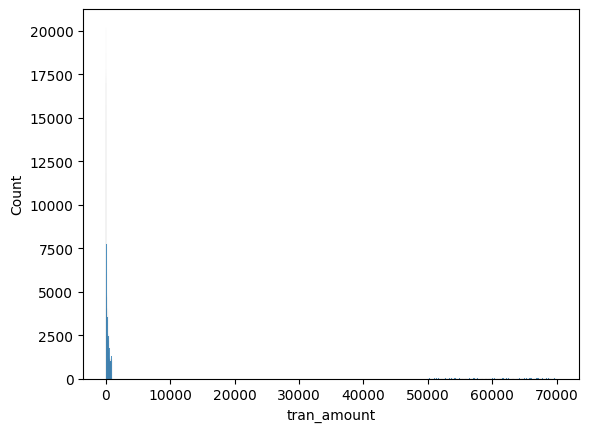

In [122]:
sns.histplot(df_trans["tran_amount"])

<Axes: xlabel='tran_amount', ylabel='Count'>

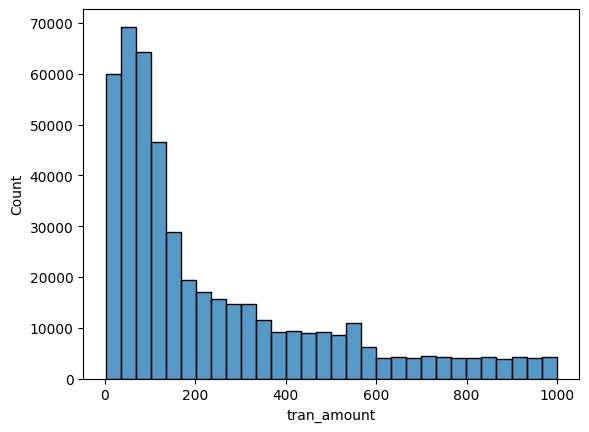

In [125]:
sns.histplot(df_trans[df_trans["tran_amount"]<10000]["tran_amount"], bins=30)

In [130]:
Q1, Q3 = df_trans["tran_amount"].quantile([0.25, 0.75])
Q1, Q3

(66.0, 413.0)

In [133]:
IQR = Q3-Q1 
lower = Q1-2*IQR
upper = Q3+2*IQR
lower, upper

(-628.0, 1107.0)

In [137]:
outliers = df_trans[df_trans["tran_amount"]>upper]
outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [149]:
categoory_wise_mean = df_trans[df_trans["tran_amount"]<upper].groupby("product_category").tran_amount.mean()
categoory_wise_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [152]:
outliers["product_category"].map(categoory_wise_mean)

26         92.167205
49         50.333298
94        176.773288
104        64.553463
113       176.773288
             ...    
499742     64.553463
499888     64.553463
499900    269.181631
499966    269.181631
499996     64.553463
Name: product_category, Length: 25000, dtype: float64

In [147]:
df_trans.loc[outliers.index, 'tran_amount'] = outliers["product_category"].map(categoory_wise_mean)

In [153]:
outliers.index

Index([    26,     49,     94,    104,    113,    121,    169,    173,    177,
          179,
       ...
       499661, 499673, 499681, 499711, 499741, 499742, 499888, 499900, 499966,
       499996],
      dtype='int64', length=25000)

<Axes: xlabel='tran_amount', ylabel='Count'>

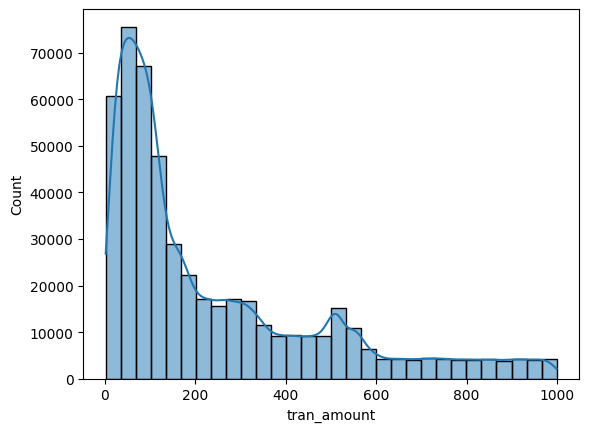

In [156]:
sns.histplot(df_trans["tran_amount"], bins=30, kde=True)

Visualization of Trans table

In [159]:
labels = df_trans["payment_type"].unique()

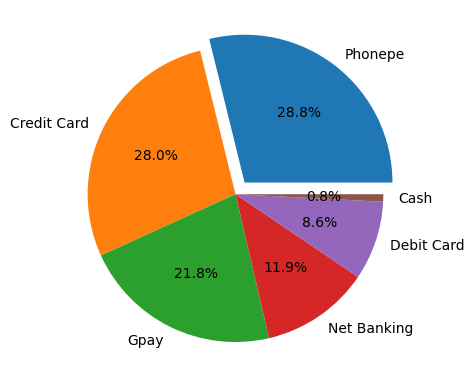

In [163]:
plt.pie(df_trans["payment_type"].value_counts(), labels=labels, autopct="%1.1f%%", explode=[0.1,0,0,0,0,0])
plt.show()

Analysis of transactions and custInfo combined

In [166]:
df_merged2 = pd.merge(df_merged, df_trans, on="cust_id", how="inner")
df_merged2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [165]:
df_merged2.shape

(499477, 22)

<Axes: xlabel='age_group', ylabel='count'>

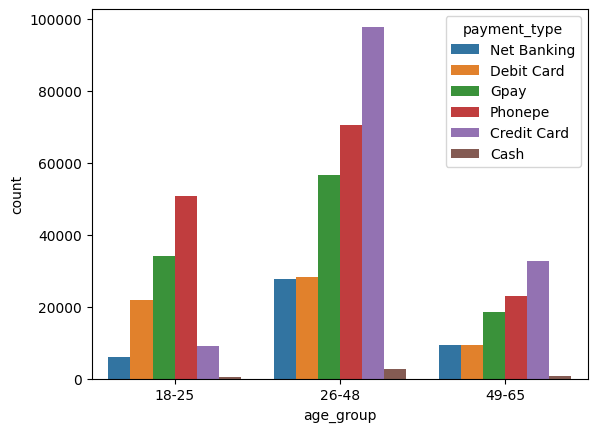

In [169]:
sns.countplot(data=df_merged2, hue="payment_type",x="age_group")